## Mark Perez Clanton
### Group 34 mprez@wisc.edu
# COVID-19 Health Outcomes: Healthcare, and Govenrment Intervention

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('precision', 3)  

## World Bank Data Cleaning and Merging
The file names correspond to the name of the statistic per the World Bank. 

Each can be found by inputing the file name into the search tool at https://data.worldbank.org/

In [2]:
GDP_capita = pd.read_excel('GDP per capita (current US$).xls', 
                           header=3, sheet_name='Data')

# Limiting to 2019 Data
GDP_capita = GDP_capita[['Country Name', 'Country Code', '2019']]
GDP_capita = GDP_capita.set_index('Country Code') # Setting country code as index

# Dropping countries with GDP per capita higher than $15,000
Too_poor = GDP_capita[GDP_capita['2019']<10000] # Grabbing countries which do not qualify
GDP_capita = GDP_capita.drop(Too_poor.index.tolist()) # Dropping unqualified countries
GDP_capita.dropna(subset=['2019'], inplace=True) # Dropping NaN values

# Obtaining my desired list of countries to later filter by
CC3 = GDP_capita.index.tolist()

print(CC3)

['AND', 'ARE', 'ATG', 'AUS', 'AUT', 'BEL', 'BHR', 'BHS', 'BMU', 'BRB', 'BRN', 'CAN', 'CEB', 'CHE', 'CHL', 'CHN', 'CRI', 'CSS', 'CUW', 'CYP', 'CZE', 'DEU', 'DNK', 'EAS', 'ECS', 'EMU', 'ESP', 'EST', 'EUU', 'FIN', 'FRA', 'GBR', 'GRC', 'GRD', 'HIC', 'HKG', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KNA', 'KOR', 'KWT', 'LCA', 'LTU', 'LUX', 'LVA', 'MAC', 'MDV', 'MLT', 'MUS', 'MYS', 'NAC', 'NLD', 'NOR', 'NZL', 'OED', 'OMN', 'OSS', 'PAN', 'PLW', 'POL', 'PRI', 'PRT', 'PST', 'QAT', 'ROU', 'RUS', 'SAU', 'SGP', 'SST', 'SVK', 'SVN', 'SWE', 'SYC', 'TCA', 'TTO', 'URY', 'USA', 'WLD']


In [3]:
# The complete dataset will be built upon:
df = GDP_capita
df.rename(columns={'2019':'GDP Capita (Current $US) 2019'}, inplace=True)
df = df.reset_index() # Back to numbers
df.head(2)

,Country Code,Country Name,GDP Capita (Current $US) 2019
0,AND,Andorra,40886.391
1,ARE,United Arab Emirates,43103.323


In [4]:
# General government final consumption expenditure (% of GDP)
Government_of_GDP = pd.read_excel('General government final consumption expenditure (% of GDP).xls', 
                           header=3, sheet_name='Data')

Government_of_GDP = Government_of_GDP[['Country Name', 'Country Code', '2019']] # Selecting desired columns
Government_of_GDP = Government_of_GDP[Government_of_GDP['Country Code'].isin(CC3)] # Keeping only countries chosen originally

# Fixing Indexes
Government_of_GDP = Government_of_GDP.set_index('Country Code')
Government_of_GDP = Government_of_GDP.reset_index()

Government_of_GDP.rename(columns={'2019':'Government Spending (%GDP) 2019'}, inplace=True) # Renaming for master df

# Merging onto master df
df = pd.merge(left=df, right=Government_of_GDP, left_on=['Country Code', 'Country Name'], 
                    right_on=['Country Code', 'Country Name'], how='outer') # Previously checked whether we had mismatches

In [5]:
#Current health expenditure per capita, PPP (current international $)
Total_health_spending = pd.read_excel('Current health expenditure per capita, PPP (current international $).xls', 
                           header=3, sheet_name='Data')

Total_health_spending = Total_health_spending[['Country Name', 'Country Code', '2018']] # Selecting desired columns # 2019 is not available
Total_health_spending = Total_health_spending[Total_health_spending['Country Code'].isin(CC3)] # Keeping only countries chosen originally

# Fixing Indexes
Total_health_spending = Total_health_spending.set_index('Country Code')
Total_health_spending = Total_health_spending.reset_index()

# Renaming for master df
Total_health_spending.rename(columns={'2018':'Health Expenditure Capita (Current $INT) 2018'}, inplace=True)

# Merging onto master df
df = pd.merge(left=df, right=Total_health_spending, left_on=['Country Code', 'Country Name'], 
                    right_on=['Country Code', 'Country Name'], how='outer') # Previously checked whether we had mismatches

In [6]:
#Current health expenditure (% of GDP)
GDP_health_spending = pd.read_excel('Current health expenditure (% of GDP).xls', 
                           header=3, sheet_name='Data')

GDP_health_spending = GDP_health_spending[['Country Name', 'Country Code', '2018']] # Selecting desired columns # 2019 is not available
GDP_health_spending = GDP_health_spending[GDP_health_spending['Country Code'].isin(CC3)] # Keeping only countries chosen originally

# Fixing Indexes
GDP_health_spending = GDP_health_spending.set_index('Country Code')
GDP_health_spending = GDP_health_spending.reset_index()

# Renaming for master df
GDP_health_spending.rename(columns={'2018':'Health Expenditure (% GDP)'}, inplace=True)

# Merging onto master df
df = pd.merge(left=df, right=GDP_health_spending, left_on=['Country Code', 'Country Name'], 
                    right_on=['Country Code', 'Country Name'], how='outer') # Previously checked whether we had mismatches

In [7]:
# Domestic general government health expenditure (% GDP)
GDPGov_health_spending = pd.read_excel('Domestic general government health expenditure (% of GDP).xls', 
                           header=3, sheet_name='Data')

# Selecting desired columns, 2019 is not available.
GDPGov_health_spending = GDPGov_health_spending[['Country Name', 'Country Code', '2018']]
# Keeping only countries chosen originally
GDPGov_health_spending = GDPGov_health_spending[GDPGov_health_spending['Country Code'].isin(CC3)]

# Fixing Indexes
GDPGov_health_spending = GDPGov_health_spending.set_index('Country Code')
GDPGov_health_spending = GDPGov_health_spending.reset_index()

# Renaming for master df
GDPGov_health_spending.rename(columns={'2018':'Government Health Expenditure (% GDP) 2018'}, inplace=True)

df = pd.merge(left=df, right=GDPGov_health_spending, left_on=['Country Code', 'Country Name'], 
                    right_on=['Country Code', 'Country Name'], how='outer') # Previously checked whether we had mismatches

In [8]:
# Domestic general government health expenditure per capita, PPP (current international $)
Gov_health_spending = pd.read_excel('Domestic general government health expenditure per capita, PPP (current international $).xls', 
                           header=3, sheet_name='Data')

# Selecting desired columns, 2019 is not available.
Gov_health_spending = Gov_health_spending[['Country Name', 'Country Code', '2018']]
# Keeping only countries chosen originally
Gov_health_spending = Gov_health_spending[Gov_health_spending['Country Code'].isin(CC3)]

# Fixing Indexes
Gov_health_spending = Gov_health_spending.set_index('Country Code')
Gov_health_spending = Gov_health_spending.reset_index()

# Renaming for master df
Gov_health_spending.rename(columns={'2018':'Government Health Expenditure Capita (Current $INT) 2018'}, inplace=True)

df = pd.merge(left=df, right=Gov_health_spending, left_on=['Country Code', 'Country Name'], 
                    right_on=['Country Code', 'Country Name'], how='outer') # Previously checked whether we had mismatches

In [9]:
# "Same" as Domestic private health expenditure (% of current health expenditure) from the World Bank Data
# "Manual" calculation
df['Private Health Expenditure Capita (% Health Expenditure Capita) 2018'] = 100*(df['Health Expenditure Capita (Current $INT) 2018'] - df['Government Health Expenditure Capita (Current $INT) 2018'])/df['Health Expenditure Capita (Current $INT) 2018']

In [10]:
# Manual calculation of Public Health Expenditure Capita (% Health Expenditure Capita) 2018
df['Public Health Expenditure Capita (% Health Expenditure Capita) 2018'] = 100 - df['Private Health Expenditure Capita (% Health Expenditure Capita) 2018']

In [11]:
# Out-of-pocket expenditure (% of current health expenditure)
Pocket_health = pd.read_excel('Out-of-pocket expenditure (% of current health expenditure).xls', 
                           header=3, sheet_name='Data')

# Selecting desired columns, 2019 is not available.
Pocket_health = Pocket_health[['Country Name', 'Country Code', '2018']]
# Keeping only countries chosen originally
Pocket_health = Pocket_health[Pocket_health['Country Code'].isin(CC3)]

# Fixing Indexes
Pocket_health = Pocket_health.set_index('Country Code')
Pocket_health = Pocket_health.reset_index()

# Renaming for master df
Pocket_health.rename(columns={'2018':'% Out of Pocket Health Expenditures 2018'}, inplace=True)

# Merging
df = pd.merge(left=df, right=Pocket_health, left_on=['Country Code', 'Country Name'], 
                    right_on=['Country Code', 'Country Name'], how='outer') # Previously checked whether we had mismatches

In [12]:
# Nurses and midwives (per 1,000 people)
nurses = pd.read_excel('Nurses and midwives (per 1,000 people).xls', 
                           header=3, sheet_name='Data')

# Selecting desired columns, 2010-2018, 19' and 20' not available.
years_nurses = []
for x in range(2010, 2019):
    years_nurses.append(str(x))
#print(years_nurses)
nurses = nurses[['Country Name', 'Country Code', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']]

# Keeping only countries chosen originally
nurses = nurses[nurses['Country Code'].isin(CC3)]

nurses = nurses.reset_index(drop=True) # Resetting the index

# Keeping the last valid entry for each country.
def sweeper(x): # https://stackoverflow.com/questions/40583482/getting-last-non-na-value-across-rows-in-a-pandas-dataframe
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
nurses['Nurses per 1000 (Latest)'] = nurses.apply(sweeper, axis=1) # Renamed for master df in the process
nurses = nurses.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], axis=1)

# Merging
df = pd.merge(left=df, right=nurses, left_on=['Country Code', 'Country Name'], 
                    right_on=['Country Code', 'Country Name'], how='outer') # Previously checked whether we had mismatches

In [13]:
# Physicians (per 1,000 people)
Physicians = pd.read_excel('Physicians (per 1,000 people).xls', 
                           header=3, sheet_name='Data')

# Selecting desired columns, 2010-2018, 19' and 20' not available.
Physicians = Physicians[['Country Name', 'Country Code', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']]

# Keeping only countries chosen originally
Physicians = Physicians[Physicians['Country Code'].isin(CC3)]

Physicians = Physicians.reset_index(drop=True) # Resetting the index

# Keeping the last valid entry for each country.
def sweeper(x): # https://stackoverflow.com/questions/40583482/getting-last-non-na-value-across-rows-in-a-pandas-dataframe
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
Physicians['Physicians per 1000 (Latest)'] = Physicians.apply(sweeper, axis=1) # Renamed for master df in the process
Physicians = Physicians.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], axis=1)

# Merging
df = pd.merge(left=df, right=Physicians, left_on=['Country Code', 'Country Name'], 
                    right_on=['Country Code', 'Country Name'], how='outer') # Must match

## OWID df Cleaning and Merging
It was donwloaded from: https://github.com/owid/covid-19-data/tree/master/public/data

It is the Complete COVID-19 dataset file.

It includes the evolution of each countries "Stringency Index". This is  quantification of govenrment restrictions based on 20 indicators/policies. It was developed by the University of Oxford. The inclusion of this measure is done in the next section.

In [14]:
# Our World in Data: Selected Pandemic related Statistics
OWID1 = pd.read_csv('owid-covid-data.csv', parse_dates=['date'], index_col=3)
OWID1 = OWID1.loc[:'01-01-2021'] # Only interested in the 2020 year

# Beds variable remains constant, easy way to pick off.
OWID_country = OWID1.groupby('iso_code').agg(['max'])

# Reindex 1
OWID_country = OWID_country.reset_index(drop=False) 

# Keeping only countries chosen originally
OWID_country = OWID_country[OWID_country['iso_code'].isin(CC3)]

# Reindex 2
OWID_country = OWID_country.reset_index(drop=True)

# Usefull Data
OWID_chosen_country = OWID_country[['iso_code', 'total_cases', 'total_deaths', 'population',
                                    'hospital_beds_per_thousand', 'life_expectancy', 'aged_65_older',
                                    'total_cases_per_million', 'total_deaths_per_million', 'total_tests_per_thousand',
                                    'tests_per_case', 'population_density']]
OWID_chosen_country.columns = OWID_chosen_country.columns.droplevel(level=1) # Removes the 'max' level

# Renaming for master df
OWID_chosen_country.rename(columns={'iso_code':'Country Code', 'total_cases':'Total Covid-19 Cases', 
                                    'total_deaths':'Total Covid-19 Deaths', 'population':'Population',
                                    'hospital_beds_per_thousand':'Hospital Beds per 1000',
                                    'life_expectancy':'Life Expectancy', 'aged_65_older':'Pop over 65',
                                    'total_cases_per_million':'Cases per Million', 'total_deaths_per_million':'Deaths per Million',
                                    'total_tests_per_thousand':'Tests per 1000', 'tests_per_case':'Tests per Case',
                                    'population_density':'Pop Density'}, inplace=True)

# Merge, left because of the missing rows.
df = pd.merge(left=df, right=OWID_chosen_country, left_on=['Country Code'], right_on=['Country Code'], how='left', indicator=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
print(df[df['_merge']=='left_only']['Country Name'].tolist()) # Either unions, or very small nonrepresentative states. Not a problem!
df = df.drop(df[df['_merge']=='left_only'].index.tolist()) # Dropping them.

['Bermuda', 'Central Europe and the Baltics', 'Caribbean small states', 'Curacao', 'East Asia & Pacific', 'Europe & Central Asia', 'Euro area', 'European Union', 'High income', 'Macao SAR, China', 'North America', 'OECD members', 'Other small states', 'Palau', 'Puerto Rico', 'Post-demographic dividend', 'Small states', 'Turks and Caicos Islands', 'World']


In [16]:
# Creating some interesting variables
df['Covid-19 Death Rate 2020 (%)'] = df['Total Covid-19 Deaths']*100/df['Total Covid-19 Cases']
df['Covid-19 Tests per Million'] = df['Tests per 1000']/1000

### Creating Medical Capital Variable
Unified measure for the number of nurses, physicians, and hospital beds per 1000 people in each country.

In [17]:
# I want to build a health capital variable composed of Nurses, physicians, and Beds per 1000. I must first normalize.

df.dtypes # Must fix Nurses and Physicians to move forward
df[df['Nurses per 1000 (Latest)'].isin(df['Country Code'].to_list())]['Nurses per 1000 (Latest)'] # HKG is a problem, and is full of NaNs: drop.
df = df.drop(df[df['Nurses per 1000 (Latest)'].isin(df['Country Code'].to_list())]['Nurses per 1000 (Latest)'].index)

# Float Nurses and Physicians
df['Nurses per 1000 (Latest)'] = df['Nurses per 1000 (Latest)'].astype(float)
df['Physicians per 1000 (Latest)'] = df['Physicians per 1000 (Latest)'].astype(float)

# Normalize the three: https://www.geeksforgeeks.org/normalize-a-column-in-pandas/ 
# Nurses
df['Nurses (normalized)'] = (df['Nurses per 1000 (Latest)'] - df['Nurses per 1000 (Latest)'].min()) / (df['Nurses per 1000 (Latest)'].max() - df['Nurses per 1000 (Latest)'].min())
# Physicians
df['Physicians (normalized)'] = (df['Physicians per 1000 (Latest)'] - df['Physicians per 1000 (Latest)'].min()) / (df['Physicians per 1000 (Latest)'].max() - df['Physicians per 1000 (Latest)'].min())
# Beds (Andorra and Maldives have missing data)
df['Beds (normalized)'] = (df['Hospital Beds per 1000'] - df['Hospital Beds per 1000'].min()) / (df['Hospital Beds per 1000'].max() - df['Hospital Beds per 1000'].min())

In [18]:
# Not Andorra and Maldives = df[~pd.isnull(df['Beds (normalized)'])]
# Created the Medical Capital Column
df['Medical Capital'] = df[~pd.isnull(df['Beds (normalized)'])]['Beds (normalized)'] + df[~pd.isnull(df['Beds (normalized)'])]['Physicians (normalized)'] + df[~pd.isnull(df['Beds (normalized)'])]['Nurses (normalized)']

# Dropping created variables
df.drop(['Nurses (normalized)', 'Physicians (normalized)', 'Beds (normalized)'], inplace=True, axis=1) 

# Dropping Andorra=0 and Maldives=51. Andorra has issues with COVID data, they are erroneous.
df.drop([0, 51], inplace=True)
df = df.reset_index(drop=True) # Renumber the index

In [19]:
#df[df['Physicians per 1000 (Latest)'].isin(df['Country Code'].to_list())]['Physicians per 1000 (Latest)'] # No issues.

## Oxford Stringency Index
I will be taking the mean as the representative measure for each country.

In [20]:
OWID = OWID1 # Taking advantage of the previous 2020 filter.
# Selecting the desired countries.
OWID = OWID[OWID['iso_code'].isin(CC3)]

# Selecting the desired columns
OWID = OWID[['iso_code', 'stringency_index']]

# For static representation of the data
OWID_Oxford_Country = OWID.groupby('iso_code').agg(['mean', pd.Series.mode])

# To remove the top shelf
OWID_Oxford_Country.columns = OWID_Oxford_Country.columns.droplevel(level=0)
OWID_Oxford_Country = OWID_Oxford_Country.reset_index(drop=False) 

# Renaming
OWID_Oxford_Country.rename(columns={'iso_code':'Country Code', 'mean':'Mean Stringency Index',
                                    'mode':'Mode Stringency Index'}, inplace=True)

df.drop('_merge', inplace=True, axis=1)
df = pd.merge(left=df, right=OWID_Oxford_Country, left_on=['Country Code'], right_on=['Country Code'], how='left', indicator=True)
df.drop('_merge', inplace=True, axis=1)

In [21]:
# Take a look at the df now, compare to code-cell 3!
df.head(2)

,Country Code,Country Name,GDP Capita (Current $US) 2019,Government Spending (%GDP) 2019,Health Expenditure Capita (Current $INT) 2018,Health Expenditure (% GDP),Government Health Expenditure (% GDP) 2018,Government Health Expenditure Capita (Current $INT) 2018,Private Health Expenditure Capita (% Health Expenditure Capita) 2018,Public Health Expenditure Capita (% Health Expenditure Capita) 2018,...,Cases per Million,Deaths per Million,Tests per 1000,Tests per Case,Pop Density,Covid-19 Death Rate 2020 (%),Covid-19 Tests per Million,Medical Capital,Mean Stringency Index,Mode Stringency Index
0,ARE,United Arab Emirates,43103.323,13.278,3172.608,4.226,2.180,1636.382,48.422,51.578,...,21200.154,67.844,2126.861,5951.0,112.442,0.320,2.127,0.552,50.795,43.5
1,ATG,Antigua and Barbuda,17112.821,NaN,1405.768,5.232,2.904,780.362,44.489,55.511,...,1623.642,51.058,NaN,NaN,231.845,3.145,NaN,0.776,NaN,[]


## Correlations
Let's see the relationship among all our statistics

In [22]:
# https://nbviewer.jupyter.org/url/badgerdata.org/extras/examples/estenson_marotta_s20_code.ipynb
corr = df.corr()
corr.style.background_gradient(cmap='Reds')
#corr['']

,GDP Capita (Current $US) 2019,Government Spending (%GDP) 2019,Health Expenditure Capita (Current $INT) 2018,Health Expenditure (% GDP),Government Health Expenditure (% GDP) 2018,Government Health Expenditure Capita (Current $INT) 2018,Private Health Expenditure Capita (% Health Expenditure Capita) 2018,Public Health Expenditure Capita (% Health Expenditure Capita) 2018,% Out of Pocket Health Expenditures 2018,Nurses per 1000 (Latest),Physicians per 1000 (Latest),Total Covid-19 Cases,Total Covid-19 Deaths,Population,Hospital Beds per 1000,Life Expectancy,Pop over 65,Cases per Million,Deaths per Million,Tests per 1000,Tests per Case,Pop Density,Covid-19 Death Rate 2020 (%),Covid-19 Tests per Million,Medical Capital,Mean Stringency Index
GDP Capita (Current $US) 2019,1.000,0.070,0.837,0.382,0.392,0.811,-0.242,0.242,-0.494,0.677,0.173,0.174,0.154,-0.103,-0.069,0.610,0.188,0.282,0.070,0.496,0.070,0.154,-0.220,0.496,0.417,-0.167
Government Spending (%GDP) 2019,0.070,1.000,0.145,0.140,0.479,0.404,-0.686,0.686,-0.509,0.264,0.195,-0.119,-0.099,-0.086,0.027,0.110,0.172,0.026,0.066,-0.019,-0.229,-0.311,0.060,-0.019,0.257,-0.211
Health Expenditure Capita (Current $INT) 2018,0.837,0.145,1.000,0.763,0.677,0.904,-0.218,0.218,-0.534,0.759,0.294,0.500,0.496,-0.033,0.045,0.628,0.395,0.351,0.287,0.259,-0.009,0.037,-0.058,0.259,0.566,-0.158
Health Expenditure (% GDP),0.382,0.140,0.763,1.000,0.850,0.664,-0.103,0.103,-0.302,0.593,0.427,0.524,0.542,0.038,0.207,0.579,0.669,0.268,0.432,-0.129,-0.030,-0.180,0.233,-0.129,0.605,-0.125
Government Health Expenditure (% GDP) 2018,0.392,0.479,0.677,0.850,1.000,0.804,-0.568,0.568,-0.575,0.609,0.433,0.290,0.317,-0.024,0.249,0.605,0.687,0.265,0.397,-0.096,-0.020,-0.218,0.168,-0.096,0.635,-0.237
Government Health Expenditure Capita (Current $INT) 2018,0.811,0.404,0.904,0.664,0.804,1.000,-0.548,0.548,-0.677,0.756,0.298,0.312,0.315,-0.070,0.079,0.631,0.424,0.314,0.250,0.286,-0.016,-0.049,-0.063,0.286,0.582,-0.214
Private Health Expenditure Capita (% Health Expenditure Capita) 2018,-0.242,-0.686,-0.218,-0.103,-0.568,-0.548,1.000,-1.000,0.790,-0.316,-0.189,0.103,0.100,0.101,-0.123,-0.259,-0.212,-0.234,-0.167,-0.013,0.048,0.205,0.045,-0.013,-0.311,0.217
Public Health Expenditure Capita (% Health Expenditure Capita) 2018,0.242,0.686,0.218,0.103,0.568,0.548,-1.000,1.000,-0.790,0.316,0.189,-0.103,-0.100,-0.101,0.123,0.259,0.212,0.234,0.167,0.013,-0.048,-0.205,-0.045,0.013,0.311,-0.217
% Out of Pocket Health Expenditures 2018,-0.494,-0.509,-0.534,-0.302,-0.575,-0.677,0.790,-0.790,1.000,-0.450,-0.166,-0.173,-0.169,0.077,0.018,-0.401,-0.088,-0.379,-0.239,-0.130,-0.008,0.156,0.106,-0.130,-0.312,0.099
Nurses per 1000 (Latest),0.677,0.264,0.759,0.593,0.609,0.756,-0.316,0.316,-0.450,1.000,0.273,0.216,0.208,-0.100,0.186,0.507,0.445,0.236,0.299,0.082,0.081,-0.111,0.016,0.082,0.752,-0.334


## Checking dependant variable skewness
I will be studying results based on number of cases but mostly death rate.

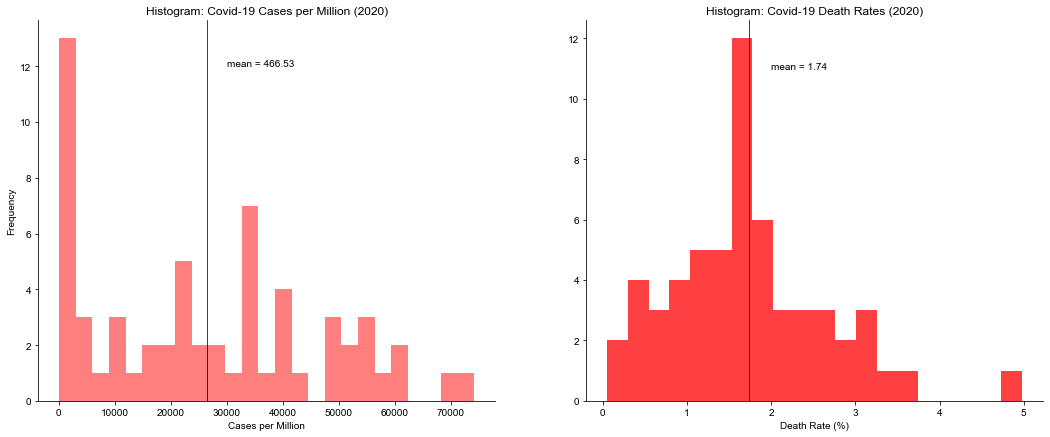

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(18,7)) # Per million

# Deaths per Million
ax[0].hist(df['Cases per Million'].dropna(), bins=25, color='red', alpha=0.50)       
ax[0].set_ylabel('Frequency') 
ax[0].set_xlabel('Cases per Million')
ax[0].set_title('Histogram: Covid-19 Cases per Million (2020)')
ax[0].axvline(x=df['Cases per Million'].dropna().mean(), color='black', linewidth=0.75)
ax[0].text(30000, 12, 'mean = {:,.2f}'.format(df['Deaths per Million'].dropna().mean()))

# Death Rate
ax[1].hist(df['Covid-19 Death Rate 2020 (%)'].dropna(), bins=20, color='red', alpha=0.75)       
ax[1].set_ylabel('') 
ax[1].set_xlabel('Death Rate (%)')
ax[1].set_title('Histogram: Covid-19 Death Rates (2020)')
ax[1].axvline(x=df['Covid-19 Death Rate 2020 (%)'].dropna().mean(), color='black', linewidth=0.75)
ax[1].text(2, 11, 'mean = {:,.2f}'.format(df['Covid-19 Death Rate 2020 (%)'].dropna().mean()))

# Spines
ax[0].spines['right'].set_visible(False) # get rid of the line on the right
ax[0].spines['top'].set_visible(False)   # get rid of the line on top
ax[1].spines['right'].set_visible(False) # get rid of the line on the right
ax[1].spines['top'].set_visible(False)   # get rid of the line on top

sns.set(font_scale=1.25)

#plt.savefig('Frequency of Cases and Deaths.svg')

plt.show()

In [24]:
# Log transformations of per million statistics (right skewed graphs)
df['Log Deaths per Million'] = np.log(df['Deaths per Million'])
df['Log Cases per Million'] = np.log(df['Cases per Million'])
df['Log Death Rate'] = np.log(df['Covid-19 Death Rate 2020 (%)'])

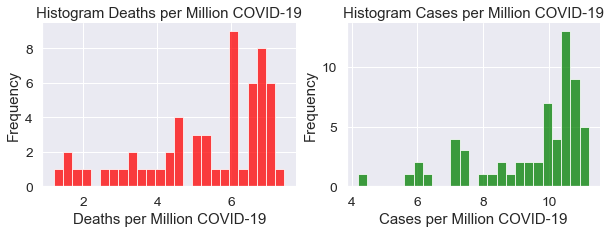

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(10,3)) # Per million

# Death per Million
ax[0].hist(df['Log Deaths per Million'].dropna(), bins=25, color='red', alpha=0.75)       
ax[0].set_ylabel('Frequency') 
ax[0].set_xlabel('Deaths per Million COVID-19')
ax[0].set_title('Histogram Deaths per Million COVID-19')

# Cases per Million
ax[1].hist(df['Log Cases per Million'].dropna(), bins=25, color='green', alpha=0.75)       
ax[1].set_ylabel('Frequency') 
ax[1].set_xlabel('Cases per Million COVID-19')
ax[1].set_title('Histogram Cases per Million COVID-19')

# Spines
ax[0].spines['right'].set_visible(False) # get ride of the line on the right
ax[0].spines['top'].set_visible(False)   # get rid of the line on top
ax[1].spines['right'].set_visible(False) # get ride of the line on the right
ax[1].spines['top'].set_visible(False)   # get rid of the line on top

plt.show()

In [26]:
df.drop(['Log Deaths per Million', 'Log Cases per Million'], inplace=True, axis=1)

## Analysis Graphs

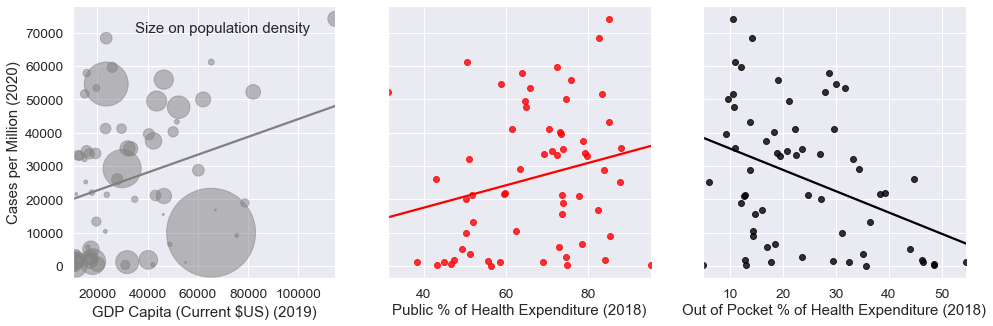

In [27]:
# Covid-19 Cases
fig, ax = plt.subplots(ncols=3, figsize=(16,5), sharey=True)

# Scatter population density
my_kws={'s':df['Pop Density'], 'alpha':0.5} # https://nbviewer.jupyter.org/url/badgerdata.org/extras/examples/estenson_marotta_s20_code.ipynb

# GDP/Capita and Covid-19 Cases
sns.regplot(x='GDP Capita (Current $US) 2019',
            y='Cases per Million',
            data=df,
            ax=ax[0],
            color='grey',
            scatter_kws = my_kws,
            ci = 0)

# Government Healthcare Spending and Covid-19 Cases
sns.regplot(x='Public Health Expenditure Capita (% Health Expenditure Capita) 2018',
            y='Cases per Million',
            data=df,
            ax=ax[1],
            color='red',
            ci = 0)

# Out of Pocket Health Spending and Covid-19 Cases
sns.regplot(x='% Out of Pocket Health Expenditures 2018',
            y='Cases per Million',
            data=df,
            ax=ax[2],
            color='black',
            ci = 0)

sns.despine(ax = ax[0])
sns.despine(ax = ax[1])
sns.despine(ax = ax[2])

ax[0].set_title('')
ax[0].set_ylabel('Cases per Million (2020)')
ax[0].set_xlabel('GDP Capita (Current $US) (2019)')
ax[0].text(35000, 70000, 'Size on population density')


ax[1].set_title('')
ax[1].set_ylabel('')
ax[1].set_xlabel('Public % of Health Expenditure (2018)')

ax[2].set_title('')
ax[2].set_ylabel('')
ax[2].set_xlabel('Out of Pocket % of Health Expenditure (2018)')

sns.set(font_scale=1.25)

#plt.savefig('Cases - GDP per Capita, Gov Health, and Pocket.svg')

plt.show()

In [28]:
df[df['Pop Density']>5000]

,Country Code,Country Name,GDP Capita (Current $US) 2019,Government Spending (%GDP) 2019,Health Expenditure Capita (Current $INT) 2018,Health Expenditure (% GDP),Government Health Expenditure (% GDP) 2018,Government Health Expenditure Capita (Current $INT) 2018,Private Health Expenditure Capita (% Health Expenditure Capita) 2018,Public Health Expenditure Capita (% Health Expenditure Capita) 2018,...,Deaths per Million,Tests per 1000,Tests per Case,Pop Density,Covid-19 Death Rate 2020 (%),Covid-19 Tests per Million,Medical Capital,Mean Stringency Index,Mode Stringency Index,Log Death Rate
53,SGP,Singapore,65233.282,10.253,4439.282,4.464,2.248,2234.973,49.655,50.345,...,4.957,927.527,6718.3,7915.731,0.049,0.928,0.641,50.149,50.9,-3.007


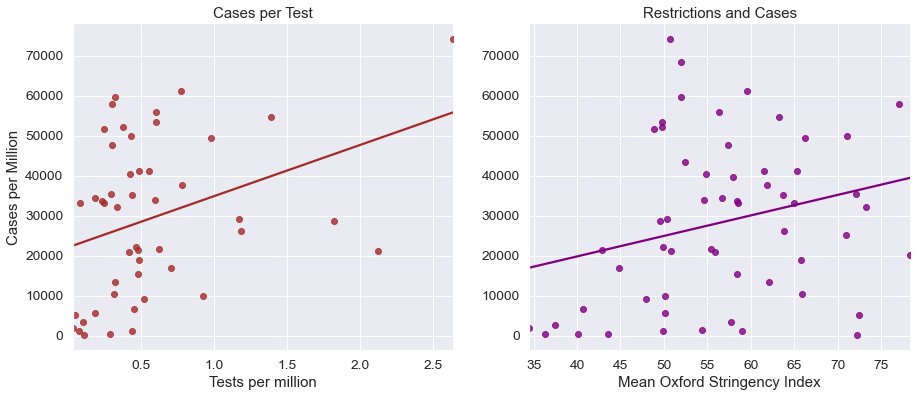

In [29]:
# Cases related to testing and restrictions.
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

df['Total Tests'] = df['Tests per 1000']*1000

# Cases and test per million
sns.regplot(x='Covid-19 Tests per Million',
            y='Cases per Million',
            data=df,
            ax=ax[0],
            color='brown',                                  
            ci = 0)

# Relative cases and restrictions
sns.regplot(x='Mean Stringency Index',
            y='Cases per Million',
            data=df,
            ax=ax[1],
            color='purple',                                  
            ci = 0)

sns.despine(ax = ax[0])
sns.despine(ax = ax[1])

ax[0].set_title('Cases per Test')
ax[0].set_ylabel('Cases per Million')
ax[0].set_xlabel('Tests per million')

ax[1].set_title('Restrictions and Cases')
ax[1].set_ylabel('')
ax[1].set_xlabel('Mean Oxford Stringency Index')

sns.set(font_scale=1.25)

#plt.savefig('Cases - Tests and Restrictions.svg')

plt.show()

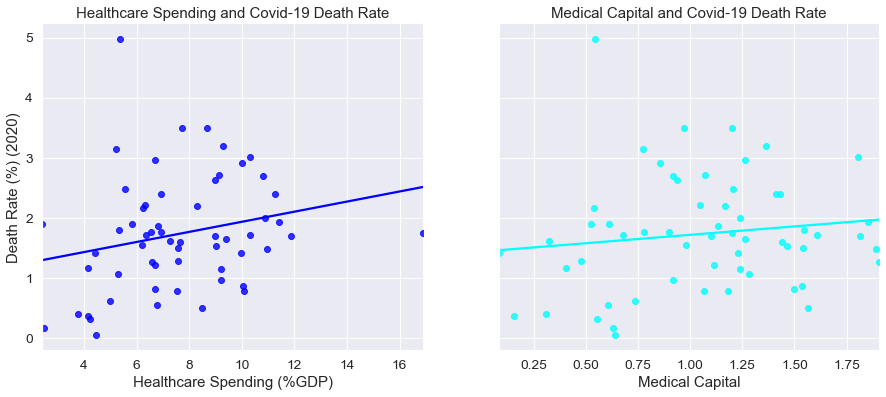

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)

# Healthcare Spending and Covid-19 Death Rate
sns.regplot(x='Health Expenditure (% GDP)',
            y='Covid-19 Death Rate 2020 (%)',
            data=df,
            ax=ax[0],
            color='blue',                                  
            ci = 0)

# Medical Capital and Covid-19 Death Rate
sns.regplot(x='Medical Capital',
            y='Covid-19 Death Rate 2020 (%)',
            data=df,
            ax=ax[1],
            color='cyan',                               
            ci = 0)

sns.despine(ax = ax[0])
sns.despine(ax = ax[1])

ax[0].set_title('Healthcare Spending and Covid-19 Death Rate')
ax[0].set_ylabel('Death Rate (%) (2020)')
ax[0].set_xlabel('Healthcare Spending (%GDP)')

ax[1].set_title('Medical Capital and Covid-19 Death Rate')
ax[1].set_ylabel('')
ax[1].set_xlabel('Medical Capital')

sns.set(font_scale=1.25)

#plt.savefig('Death - Health and Med cap.svg')  

plt.show()

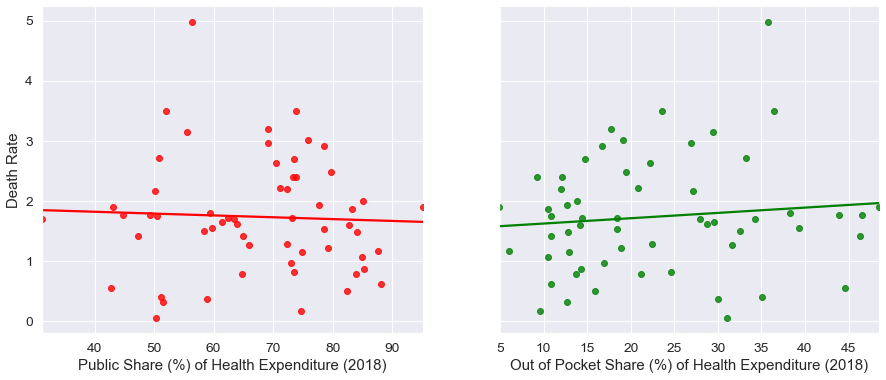

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)

# Public Healthcare funding and Covid-19 Death Rate
sns.regplot(x='Public Health Expenditure Capita (% Health Expenditure Capita) 2018',
            y='Covid-19 Death Rate 2020 (%)',
            data=df,
            ax=ax[0],
            color='red',                                  
            ci = 0)

# Out of pocket Healthcare Spending and Covid-19 Death Rate
sns.regplot(x='% Out of Pocket Health Expenditures 2018',
            y='Covid-19 Death Rate 2020 (%)',
            data=df,
            ax=ax[1],
            color='green',                                  
            ci = 0)

sns.despine(ax = ax[0])
sns.despine(ax = ax[1])

ax[0].set_title('')
ax[0].set_ylabel('Death Rate')
ax[0].set_xlabel('Public Share (%) of Health Expenditure (2018)')

ax[1].set_title('')
ax[1].set_ylabel('')
ax[1].set_xlabel('Out of Pocket Share (%) of Health Expenditure (2018)')

sns.set(font_scale=1.25)

#plt.savefig('Death - Health Public and Pocket.svg')

plt.show()

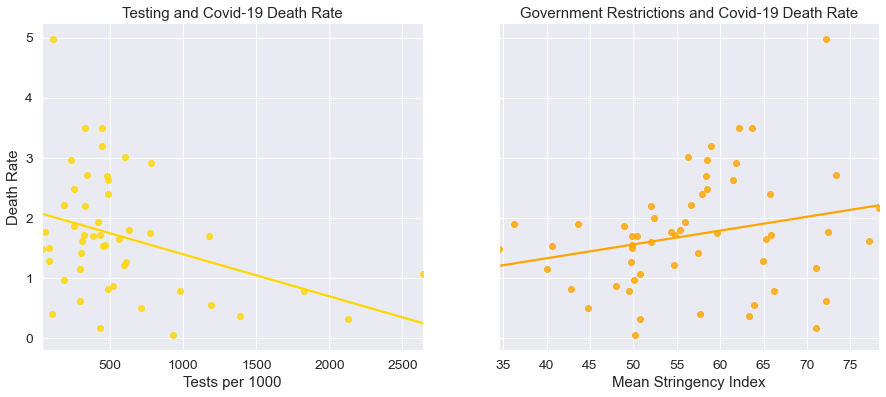

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)

# Tests per 1000 and Covid-19 Death Rate # Could make marjker size dpendant on casse/population
sns.regplot(x='Tests per 1000',
            y='Covid-19 Death Rate 2020 (%)',
            data=df,
            ax=ax[0],
            color='gold',                                  
            ci = 0)

# Mean Stringency Index
sns.regplot(x='Mean Stringency Index',
            y='Covid-19 Death Rate 2020 (%)',
            data=df,
            ax=ax[1],
            color='orange',                                  
            ci = 0)

sns.despine(ax = ax[0])
sns.despine(ax = ax[1])

ax[0].set_title('Testing and Covid-19 Death Rate')
ax[0].set_ylabel('Death Rate')
ax[0].set_xlabel('Tests per 1000')

ax[1].set_title('Government Restrictions and Covid-19 Death Rate')
ax[1].set_ylabel('')
ax[1].set_xlabel('Mean Stringency Index')

sns.set(font_scale=1.25)

#plt.savefig('Death - Tests and Stringency.svg')

plt.show()

## Regression

In [33]:
import statsmodels.formula.api as smf

# smf does not like non alphanumeric characters...
df_ = df.copy()

df_.columns = df_.columns.str.replace(r'\W+',' ') # Removes non alphanumeric
# https://stackoverflow.com/questions/56528760/how-to-remove-numbers-from-all-column-names-headers-in-a-dataframe
df_.columns = df_.columns.str.replace(r'\d+','') # Removes numbers
# https://stackoverflow.com/questions/59177208/how-to-replace-blank-space-with-on-every-elements-list-python
df_.columns = df_.columns.str.replace('\s+','_') # Replaces ' ' with '_'

In [34]:
df_['X'] = df_['Public_Health_Expenditure_Capita_Health_Expenditure_Capita_'] # Renaming for table readibility

In [35]:
reg = smf.ols('Covid_Death_Rate_~ X', data=df_).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      Covid_Death_Rate_   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.1139
Date:                Fri, 07 May 2021   Prob (F-statistic):              0.737
Time:                        17:54:56   Log-Likelihood:                -78.879
No. Observations:                  58   AIC:                             161.8
Df Residuals:                      56   BIC:                             165.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9461      0.623      3.126      0.0

In [36]:
# https://economics.stackexchange.com/questions/11774/outputting-regressions-as-table-in-python-similar-to-outreg-in-stata

# Exporting the table above to LaTeX

#   beginningtex = """\\documentclass{report}
#   \\usepackage{booktabs}
#   \\begin{document}"""
#   endtex = "\end{document}"

#   f = open('myreg.tex', 'w')
#   f.write(beginningtex)
#   f.write(reg.summary().as_latex())
#   f.write(endtex)
#   f.close()

## Data Cleaning Conclusion
Many variables were left unused. I thought they could be interesting, but lacked the time or space in the report to include all...